# ***RESULTADOS***

## *ÍNDICE:* 
---
0. INTRODUCCIÓN
1. ANÁLISIS EXPLORATORIO DE DATOS (EDA)
    - 1.1. Acondicionamiento bases de datos
    - 1.2. Análisis visual
    - 1.3. Análisis estadístico  
2. MACHINE LEARNING
    - 2.1. Preparación y limpieza de datos
    - 2.2. Feature Engineering
    - 2.3. Modelado
3. **RESULTADOS**
    - [3.1. Visualización y reporting de los resultados](#31)
    - [3.2. Creación de un pipeline para el flujo automatizado](#32)
---

In [1]:
# Librery
from utils.libreries import *

%matplotlib inline 

##  **3.1. Visualización y reporting de los resultados**<a id='31'></a>

In [2]:
sns.set(rc={'figure.figsize':(15, 8)})

In [3]:
csv_baseline_metrics = pd.read_csv('model/model_metrics/baseline_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
csv_baseline_fs_metrics = pd.read_csv('model/model_metrics/baseline_fs_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
csv_metrics = pd.read_csv('model/model_metrics/metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
csv_balanced_metrics = pd.read_csv('model/model_metrics/metrics_balanced.csv',sep=';').sort_values(by='Recall',ascending=False)
csv_fs_metrics = pd.read_csv('model/model_metrics/fs_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
csv_fs_balanced_metrics = pd.read_csv('model/model_metrics/fs_balanced_metrics.csv',sep=';').sort_values(by='Recall',ascending=False)
#csv_DL_metrics = pd.read_csv('model/model_metrics/DL_metrics_hyp.csv',sep=';').sort_values(by='Recall',ascending=False)

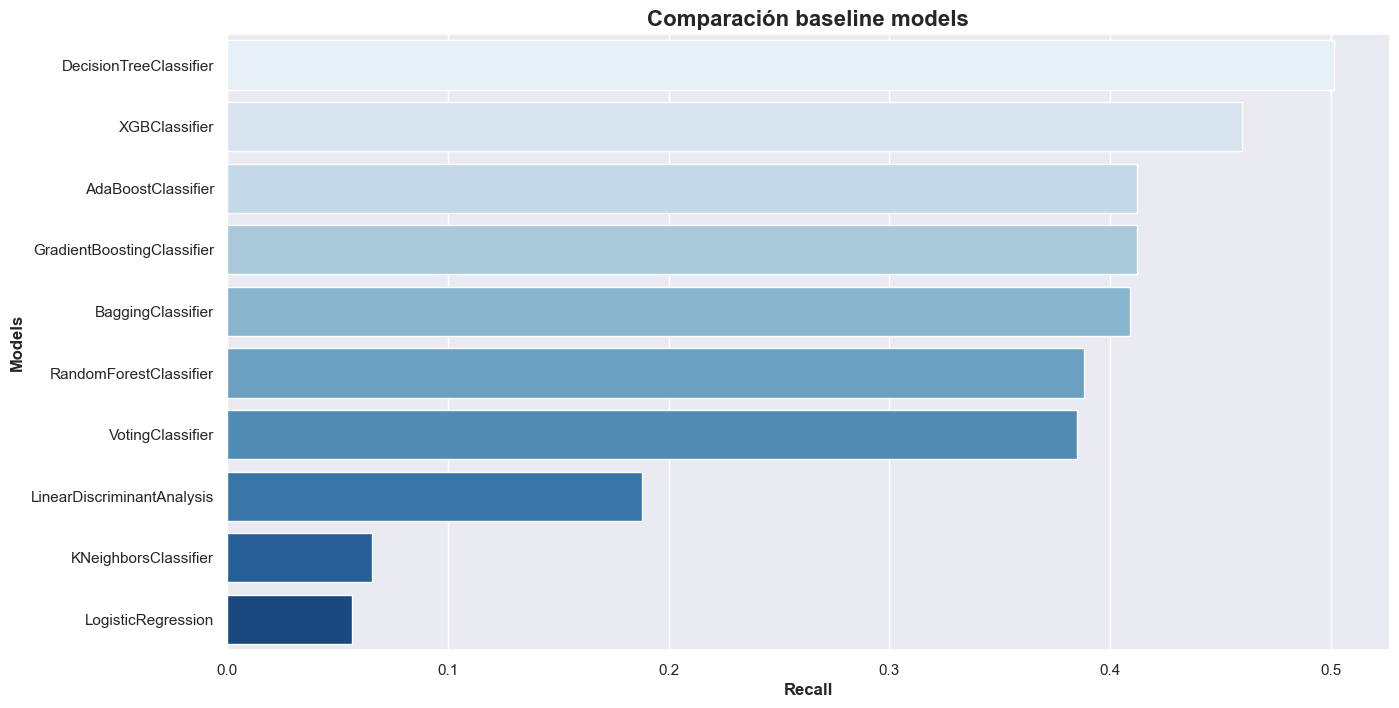

In [4]:
models_comparation(csv_baseline_metrics,title="Comparación baseline models")

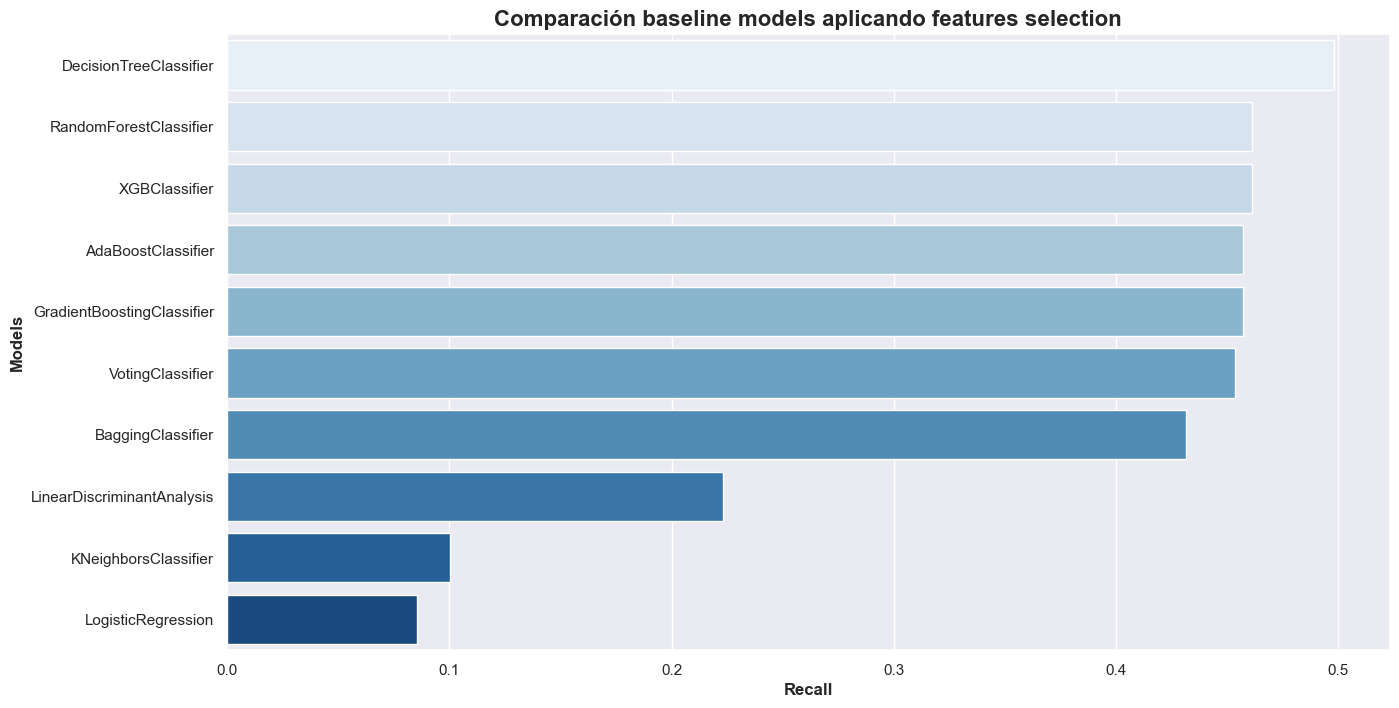

In [5]:
models_comparation(csv_baseline_fs_metrics,title="Comparación baseline models aplicando features selection")

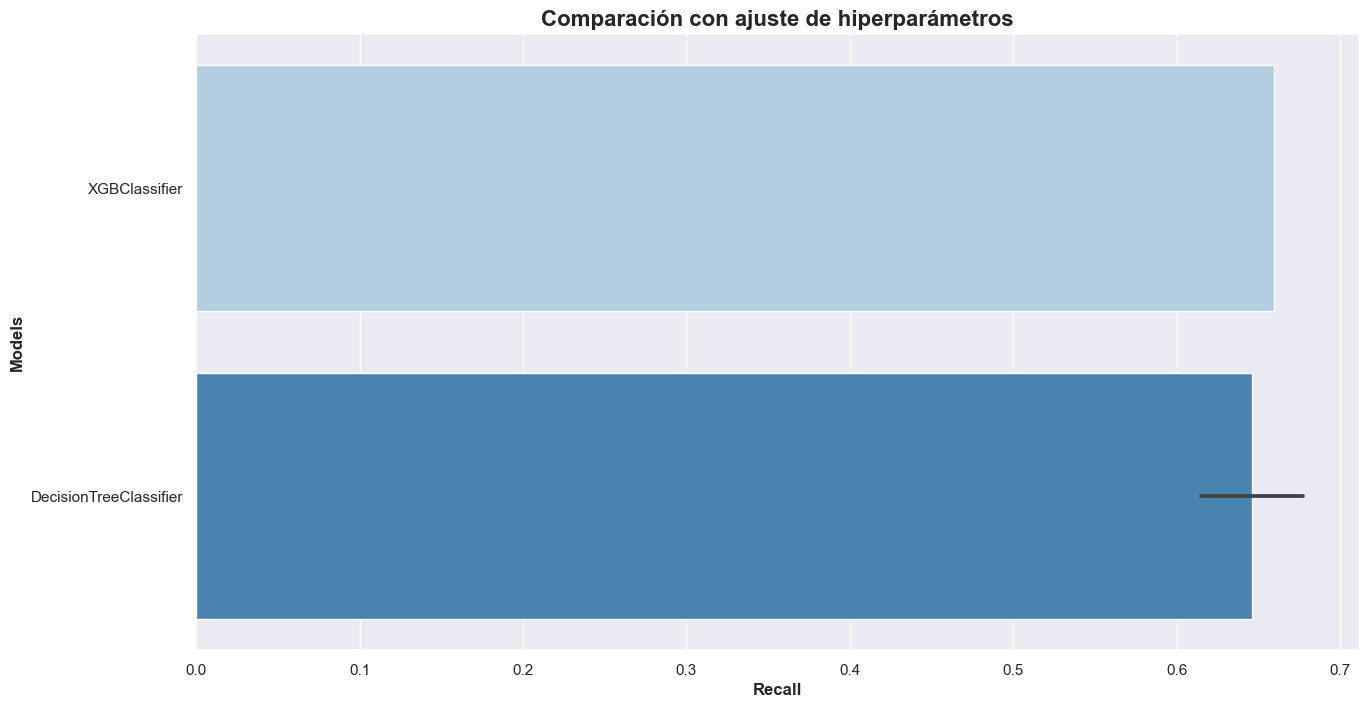

In [11]:
models_comparation(pd.concat([csv_balanced_metrics,csv_metrics])
                   ,title="Comparación con ajuste de hiperparámetros")

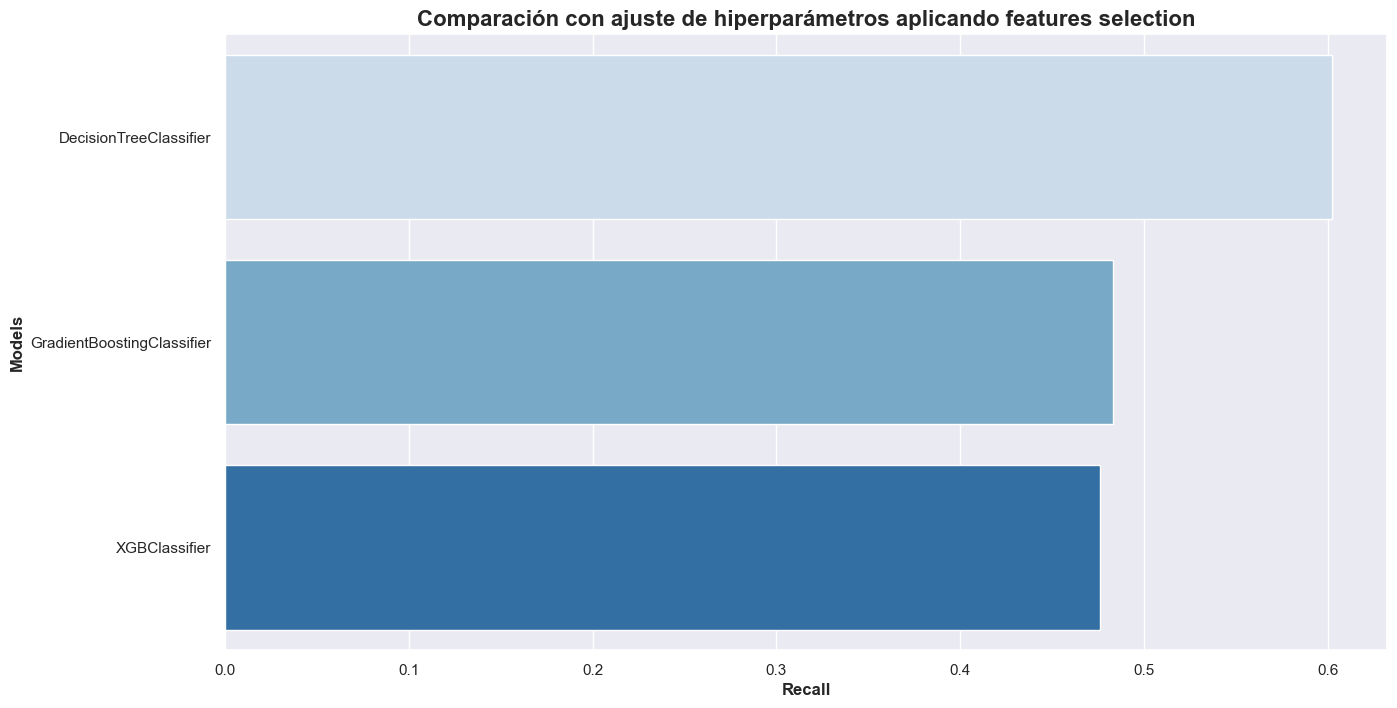

In [12]:
models_comparation(csv_fs_metrics, title = "Comparación con ajuste de hiperparámetros aplicando features selection", del_last = False)

In [ ]:
#models_comparation(csv_DL_metrics, title = "Prueba con redes neuronales simples", del_last = False, selected_colors=['slategray'])

In [16]:
csv_all_models=pd.concat([csv_metrics,csv_balanced_metrics,csv_fs_metrics,csv_fs_balanced_metrics])

csv_all_models.reset_index(drop=True,inplace=True)
csv_all_models.sort_values(by='Recall',ascending=False)

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
7,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.757031,0.449275,0.691450,0.544656,0.732965,0.374245,model/DecisionTreeClassifier_2.pkl
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'ent...",0.690000,0.369106,0.677612,0.477895,0.685446,0.313970,model/DecisionTreeClassifier.pkl
8,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.794531,0.508475,0.669145,0.577849,0.748519,0.406321,model/XGBClassifier_1.pkl
1,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': 'balanced', 'criterion': 'gin...",0.813125,0.544118,0.662687,0.597577,0.757825,0.426104,model/RandomForestClassifier.pkl
2,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.793750,0.505721,0.659701,0.572539,0.744475,0.401089,model/XGBClassifier_2.pkl
3,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.753750,0.437367,0.614925,0.511166,0.702720,0.343333,model/DecisionTreeClassifier_3.pkl
4,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'ent...",0.742969,0.421875,0.602230,0.496172,0.691323,0.329939,model/DecisionTreeClassifier_1.pkl
5,GradientBoostingClassifier,"[{'learning_rate': [0.1, 0.05, 0.01, 0.001], '...","{'criterion': 'friedman_mse', 'learning_rate':...",0.791406,0.503876,0.483271,0.493359,0.678332,0.327456,model/GradientBoostingClassifier.pkl
6,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.858594,0.761905,0.475836,0.585812,0.718136,0.414239,model/XGBClassifier.pkl


In [17]:
csv_all_models.loc[csv_all_models['Recall']>0.65,:]

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'ent...",0.690000,0.369106,0.677612,0.477895,0.685446,0.313970,model/DecisionTreeClassifier.pkl
1,RandomForestClassifier,"{'n_estimators': array([ 10, 25, 41, 56, 7...","{'class_weight': 'balanced', 'criterion': 'gin...",0.813125,0.544118,0.662687,0.597577,0.757825,0.426104,model/RandomForestClassifier.pkl
2,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 0.6, 'learning_rate': 0.0...",0.793750,0.505721,0.659701,0.572539,0.744475,0.401089,model/XGBClassifier_2.pkl
7,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'gin...",0.757031,0.449275,0.691450,0.544656,0.732965,0.374245,model/DecisionTreeClassifier_2.pkl
8,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.794531,0.508475,0.669145,0.577849,0.748519,0.406321,model/XGBClassifier_1.pkl


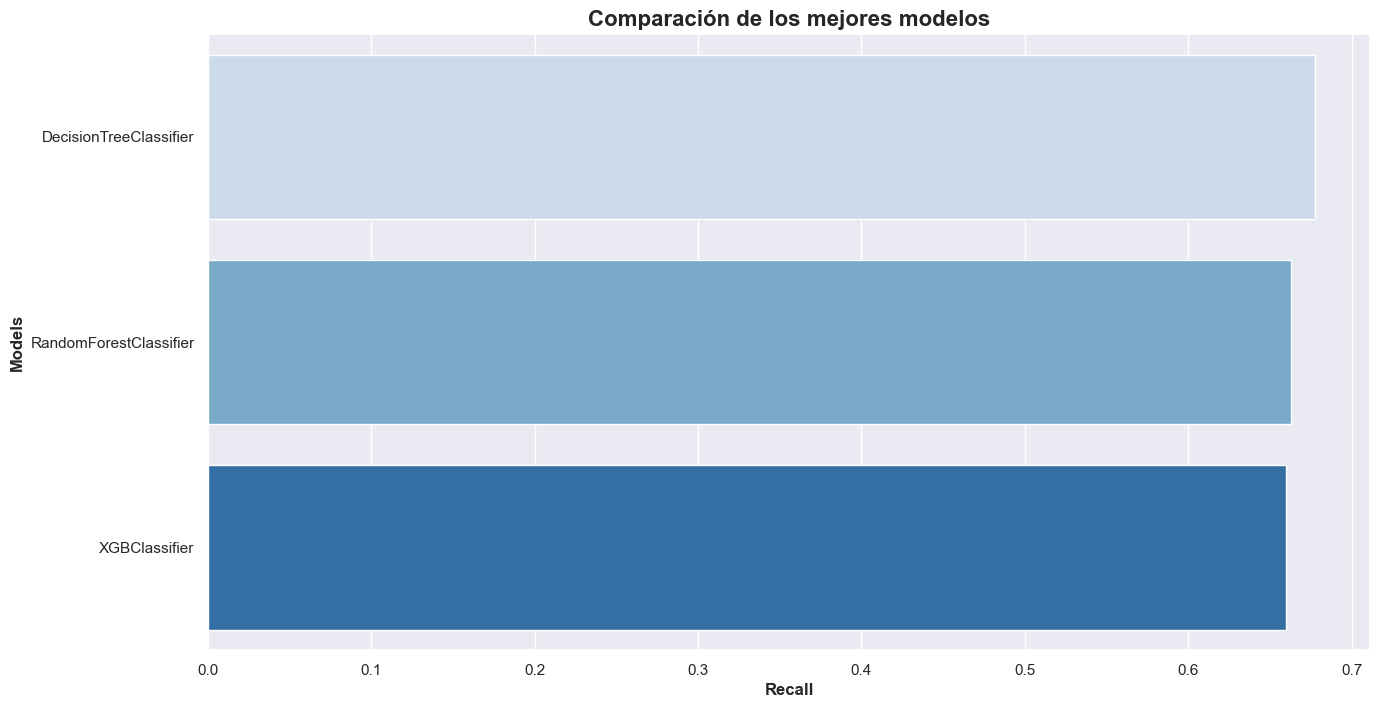

In [19]:
csv_best_models=csv_all_models[:3]
csv_best_models.reset_index(drop=True,inplace=True)
models_comparation(csv_best_models,title="Comparación de los mejores modelos",del_last=False)

El ***modelo considerado óptimo*** según las métricas obtenidas es el siguiente y es el que se utilizará en la automatización/productivización.

In [20]:
saved_metrics = csv_all_models.sort_values(by='Recall',ascending=False)
ruta_model = os.path.join(os.getcwd(),list(saved_metrics['model_path'])[0])

modelo_seleccionado = pickle.load(open(ruta_model,'rb'))

In [21]:
modelo_seleccionado

DecisionTreeClassifier(class_weight='balanced', max_depth=9,
                       max_features='sqrt')